Autoencoder

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import os
import glob
import matplotlib.image as mpimg

2024-08-04 16:45:20.033564: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-04 16:45:20.193240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 16:45:20.264924: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 16:45:20.265994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 16:45:20.390383: I tensorflow/core/platform/cpu_feature_gua

In [2]:

# Verificar si TensorFlow reconoce la GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow reconoce las siguientes GPU:")
    for gpu in gpus:
        print(f" - {gpu}")
else:
    print("TensorFlow no reconoce ninguna GPU")

TensorFlow reconoce las siguientes GPU:
 - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-08-04 16:46:42.839793: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:46:42.977561: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 16:46:42.977597: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Carga de datos

In [3]:
def leer_jpg_de_subcarpetas(carpeta_principal):
    # Obtener todas las rutas de archivos .jpg en todas las subcarpetas
    rutas_jpg = glob.glob(os.path.join(carpeta_principal, '**', '*.jpg'), recursive=True)
    
    return rutas_jpg

def load_files(files_list):
    data=[]
    for file_path in files_list:
        img=cv2.imread(file_path,0)
        data.append(img)
    return data

In [4]:
path='/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/Dataset'
jpg_path=leer_jpg_de_subcarpetas(path)
print(len(jpg_path))

9997


In [5]:
data=[]
print(len(jpg_path))
batch_size=len(jpg_path)//13
step=0
for i in range(13):
    data+=load_files(jpg_path[step:batch_size+step])
    step+=batch_size
    print(f"{i+1} bloques leidos")

9997
1 bloques leidos
2 bloques leidos
3 bloques leidos
4 bloques leidos
5 bloques leidos
6 bloques leidos
7 bloques leidos
8 bloques leidos
9 bloques leidos
10 bloques leidos
11 bloques leidos
12 bloques leidos
13 bloques leidos


Exploración de los datos


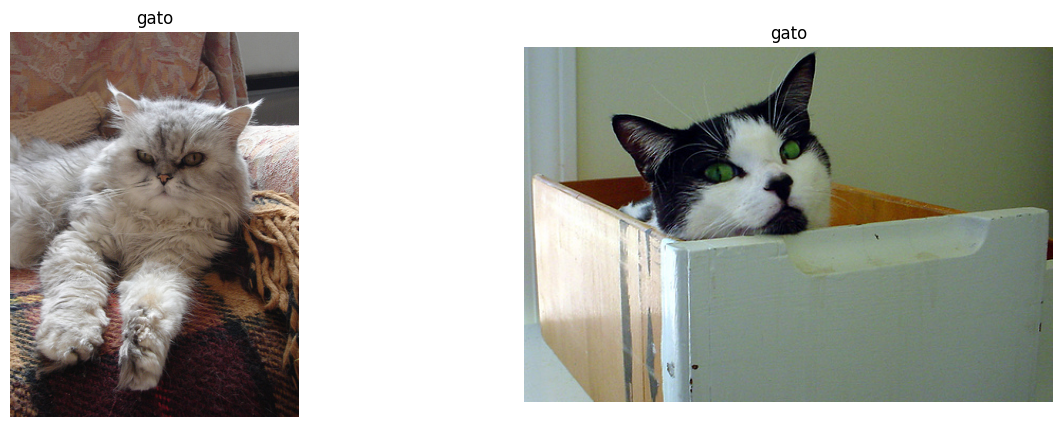

In [6]:
def show_images(image_paths, titles):
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Ajustar el tamaño de la figura según el número de imágenes
    for i in range(num_images):
        # Cargar la imagen y convertirla a RGB
        image = cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB)
        # Mostrar la imagen en la subtrama correspondiente
        axes[i].imshow(image)
        axes[i].axis('off')  # Desactivar los ejes
        axes[i].set_title(titles[i])  # Establecer el título de la subtrama
    plt.show()
    
def show_loaded_images(images, titles):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Ajustar el tamaño de la figura según el número de imágenes
    
    for i in range(num_images):
        # Convertir la imagen de BGR a RGB
        image_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        
        # Mostrar la imagen en la subtrama correspondiente
        axes[i].imshow(image_rgb)
        axes[i].axis('off')  # Desactivar los ejes
        axes[i].set_title(titles[i])  # Establecer el título de la subtrama
    
    plt.show()
image_paths = [jpg_path[0], jpg_path[8000]]
titles = ['gato', 'gato']
show_images(image_paths, titles)

Normalizado de los datos

In [7]:
def shape_fix(img):
    if img.shape[1]<img.shape[0]:
        image=img[0:img.shape[1],0:img.shape[1]]
    elif img.shape[1]>img.shape[0]:
        image=img[0:img.shape[0],0:img.shape[0]]
    else:
        image=img
    return cv2.resize(image,(128,128))

In [8]:
fixed_images=[shape_fix(image) for image in data]

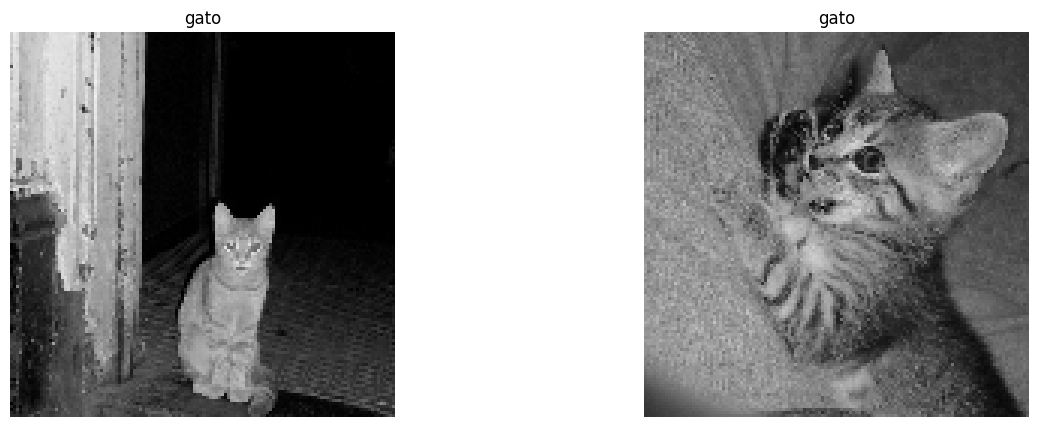

In [9]:
show_loaded_images((fixed_images[400],fixed_images[250]),['gato','gato'])

In [10]:
print(fixed_images[1].shape)

(128, 128)


In [11]:
for image in fixed_images:
    image=tf.convert_to_tensor(image,dtype=tf.float32)
    image=image/255

2024-08-04 17:12:30.610569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 17:12:30.610635: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 17:12:30.610651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 17:12:30.751495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-04 17:12:30.751615: I external/local_xla/xla/stream_executor

Modelo

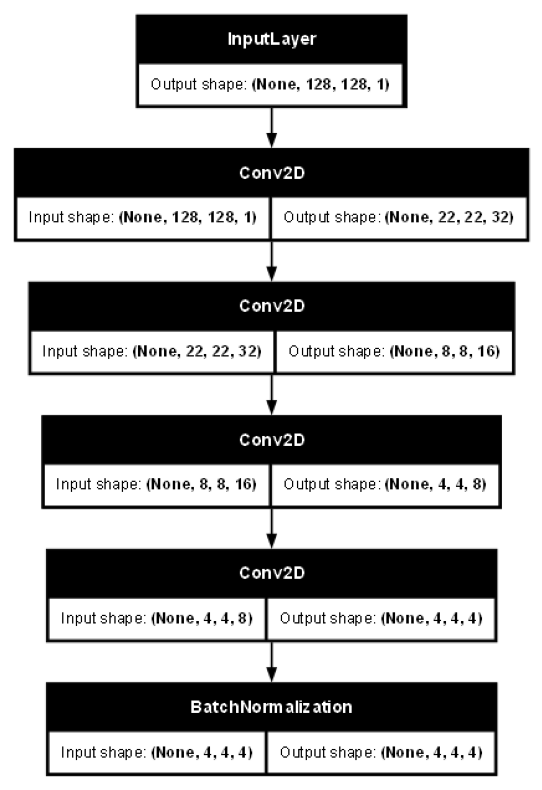

In [12]:
#Encoder

input_layer=tf.keras.layers.Input((128,128,1))

X=tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',strides=6)(input_layer)
#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',strides=3)(X)

#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',strides=2)(X)

#X=tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='same')(X)
X=tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),activation='relu',padding='same')(X)
X=tf.keras.layers.BatchNormalization()(X)

encoder=tf.keras.Model(inputs=input_layer, outputs=X)

tf.keras.utils.plot_model(encoder,to_file='encoder.png', show_shapes=True, dpi=64,show_dtype=False)
#Latent_size=(16,16,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/encoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()



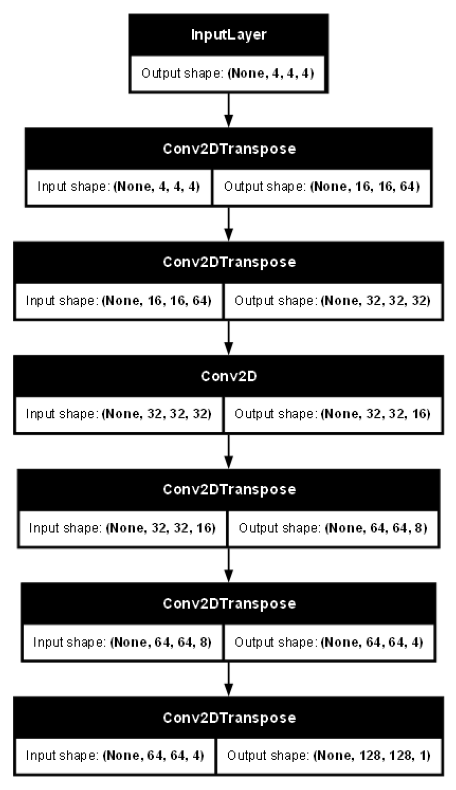

In [13]:
#Quitar input layer


input_layer2=tf.keras.layers.Input(shape=encoder.output_shape[1:])
Y=tf.keras.layers.Conv2DTranspose(64,kernel_size=(3,3),activation='relu',padding='same',strides=4)(input_layer2)
Y=tf.keras.layers.Conv2DTranspose(32,kernel_size=(3,3),activation='relu',padding='same',strides=2)(Y)

Y=tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',padding='same')(Y)

Y=tf.keras.layers.Conv2DTranspose(8,kernel_size=(3,3),activation='relu',padding='same',strides=2)(Y)

Y=tf.keras.layers.Conv2DTranspose(4,(3,3),activation='relu',padding='same')(Y)
Y=tf.keras.layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same',strides=2)(Y)
decoder=tf.keras.Model(inputs=input_layer2,outputs=Y)




"""
input_layer2=tf.keras.layers.Input(shape=encoder.output_shape[1:])
Y=tf.keras.layers.Flatten()(input_layer2)
Y=tf.keras.layers.Dense(64*64,activation='sigmoid')(Y)
Y=tf.keras.layers.Reshape((64,64))(Y)
decoder=tf.keras.Model(inputs=input_layer2,outputs=Y)
"""
tf.keras.utils.plot_model(decoder,to_file='decoder.png', show_shapes=True, dpi=64,show_dtype=False)
Latent_size=(2,2,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/decoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

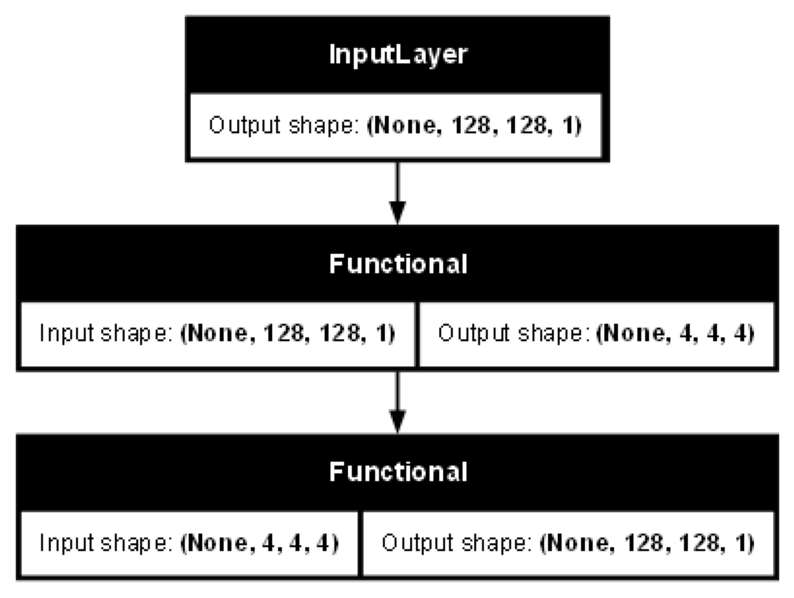

In [14]:
encoded=encoder(input_layer)
decoded=decoder(encoded)
autoencoder=tf.keras.models.Model(input_layer,decoded)
tf.keras.utils.plot_model(autoencoder,to_file='autoencoder.png', show_shapes=True, dpi=64,show_dtype=False)
#Latent_size=(16,16,48)
img = mpimg.imread('/mnt/d/Repositorios/Deep_Learning/Temas Selectos/P2/AUTOENCODER/Image_autoencoder/autoencoder.png')
plt.figure(figsize=(10, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 4, 4, 4)        │         6,412 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_3 (Functional)       │ (None, 128, 128, 1)    │        26,945 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,357 (130.30 KB)

 Trainable params: 33,349 (130.27 KB)

 Non-trainable params: 8 (32.00 B)

In [25]:
latent_dim = 256 

class Autoencoder(tf.keras.models.Model):
  def __init__(self, encoder,decoder):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = encoder
    self.decoder = decoder

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)
  
  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean
  
  
  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(encoder,decoder)


#autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001) ,loss='binary_crossentropy',metrics=['mse','accuracy'])

Entrenamiento

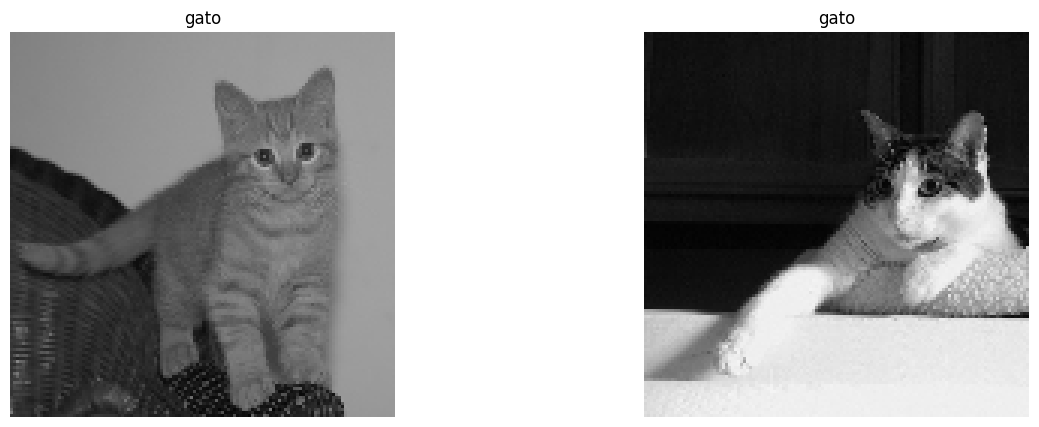

In [26]:
np.random.shuffle(fixed_images)
#print(len(data))
show_loaded_images((fixed_images[0],fixed_images[9000]),['gato','gato'])


In [27]:
X_train,X_test,_,_=train_test_split(fixed_images,fixed_images,test_size=.2,random_state=42)
X_test,X_valid,_,_=train_test_split(X_test,X_test,test_size=.2,random_state=42)

7997
1600
400


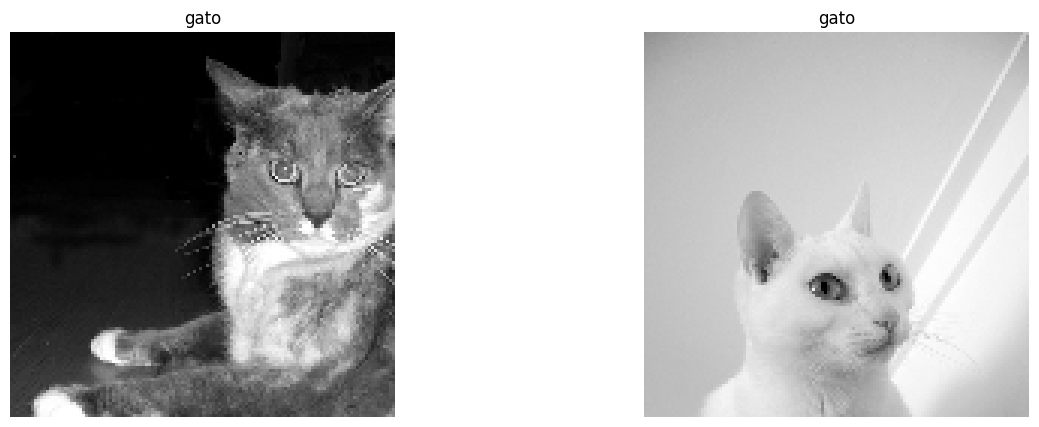

In [28]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))
show_loaded_images((X_train[0],X_test[1500]),['gato','gato'])

In [29]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_valid=np.array(X_valid)

In [30]:
print(X_train[600].shape)

(128, 128)


In [47]:
"""

#LOSS
LAMBDA=100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def autoencoder_loss(aut_enc_generated_output, gen_output, target):
  aut_enc_loss = loss_object(tf.ones_like(aut_enc_generated_output), aut_enc_generated_output)
  return aut_enc_loss

optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5)



@tf.function
def train_step(input_image,step):
    with tf.GradientTape() as aut_enc_tape:
        aut_enc_prediction=Autoencoder(input_image,training=True)
        loss=autoencoder_loss(aut_enc_prediction,input_image)
        autoencoder_gradient=aut_enc_tape.gradient(zip(loss,
                                                       Autoencoder.trainable_variables))
        optimizer.apply_gradients(zip(autoencoder_gradient,
                                      Autoencoder.trainable_variables))
        
        tf.summary.scalar('Loss', loss, step=step//1000)
        
        """

"\n\n#LOSS\nLAMBDA=100\nloss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)\ndef autoencoder_loss(aut_enc_generated_output, gen_output, target):\n  aut_enc_loss = loss_object(tf.ones_like(aut_enc_generated_output), aut_enc_generated_output)\n  return aut_enc_loss\n\noptimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5)\n\n\n\n@tf.function\ndef train_step(input_image,step):\n    with tf.GradientTape() as aut_enc_tape:\n        aut_enc_prediction=Autoencoder(input_image,training=True)\n        loss=autoencoder_loss(aut_enc_prediction,input_image)\n        autoencoder_gradient=aut_enc_tape.gradient(zip(loss,\n                                                       Autoencoder.trainable_variables))\n        optimizer.apply_gradients(zip(autoencoder_gradient,\n                                      Autoencoder.trainable_variables))\n        \n        tf.summary.scalar('Loss', loss, step=step//1000)\n        \n        "

In [31]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [48]:
"""
def fit(train,steps):
    for step,input_image in train.repeat(1).take(steps).enumerate():
        train_step(input_image,input_image,step)
        if (step+1) % 10 == 0:
            print('.', end='', flush=True)
"""

"\ndef fit(train,steps):\n    for step,input_image in train.repeat(1).take(steps).enumerate():\n        train_step(input_image,input_image,step)\n        if (step+1) % 10 == 0:\n            print('.', end='', flush=True)\n"

In [49]:
#batch_size=200
#fit(X_train,steps=100)

In [32]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Métrica a monitorizar
    patience=5,           # Número de épocas sin mejora después de las cuales se detendrá el entrenamiento
    restore_best_weights=True  # Restaurar los mejores pesos al final del entrenamiento
)

#History= autoencoder.fit(X_train,X_train,epochs=100,shuffle=True,validation_data=(X_test,X_test), callbacks=[early_stopping])

optimizer = tf.keras.optimizers.Adam(1e-4)

epochs=100
for i in range(epochs):
    for image in x_train:
        train_step(autoencoder,image,optimizer)

ValueError: in user code:

    File "/tmp/ipykernel_2156/3757551832.py", line 30, in train_step  *
        loss = compute_loss(model, x)
    File "/tmp/ipykernel_2156/3757551832.py", line 12, in compute_loss  *
        mean, logvar = model.encode(x)
    File "/tmp/ipykernel_2156/1183889756.py", line 17, in encode  *
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    File "/home/alvaromontero/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/home/alvaromontero/.local/lib/python3.10/site-packages/keras/src/layers/input_spec.py", line 245, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 128, 128, 1), found shape=(28, 28)


In [51]:
print(X_test[1].shape)
val=autoencoder.predict(X_train)
for image in val:
    image=image*255


(128, 128)
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


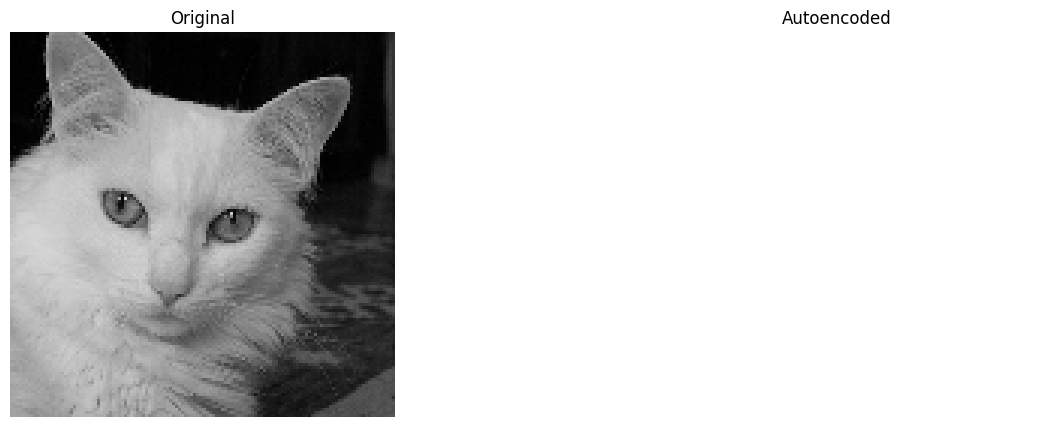

In [53]:
index=int(np.random.uniform(0,6000))
show_loaded_images((X_train[index],val[index]),['Original','Autoencoded'])